In [2]:
#add home or away column
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
dat = pd.read_csv('original_game_data.csv')

bat=dat[dat.BatterTeam=='TEX_AGG']

In [3]:
bat.head()

,Unnamed: 0,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherThrows,PitcherTeam,Batter,...,ax0,ay0,az0,HomeTeam,AwayTeam,Stadium,Week,Week_Factor,ERA,BatAvg
14,15,15,2/16/2018,6:41:50 PM,1,1,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",...,9.037551,25.938566,-14.985377,TEX_AGG,RHO_RAM,BlueBell,7,Weekday,NaN,NaN
15,16,16,2/16/2018,6:42:08 PM,1,2,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",...,13.994600,25.126365,-15.372525,TEX_AGG,RHO_RAM,BlueBell,7,Weekday,NaN,NaN
16,17,17,2/16/2018,6:42:32 PM,1,3,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",...,10.375418,29.264027,-16.209300,TEX_AGG,RHO_RAM,BlueBell,7,Weekday,NaN,NaN
17,18,18,2/16/2018,6:42:50 PM,1,4,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",...,13.342081,27.708265,-12.368862,TEX_AGG,RHO_RAM,BlueBell,7,Weekday,NaN,NaN
18,19,19,2/16/2018,6:43:09 PM,1,5,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",...,13.347353,26.468049,-12.770299,TEX_AGG,RHO_RAM,BlueBell,7,Weekday,NaN,NaN


In [4]:
bat.iloc[:, 0:20].head(10)

,Unnamed: 0,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherThrows,PitcherTeam,Batter,BatterSide,BatterTeam,Inning,Outs,Balls,Strikes,TaggedPitchType,AutoPitchType,PitchCall,KorBB
14,15,15,2/16/2018,6:41:50 PM,1,1,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",Right,TEX_AGG,1,0,0,0,Fastball,Fastball,BallCalled,Undefined
15,16,16,2/16/2018,6:42:08 PM,1,2,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",Right,TEX_AGG,1,0,1,0,Fastball,Fastball,BallCalled,Undefined
16,17,17,2/16/2018,6:42:32 PM,1,3,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",Right,TEX_AGG,1,0,2,0,Fastball,Fastball,StrikeSwinging,Undefined
17,18,18,2/16/2018,6:42:50 PM,1,4,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",Right,TEX_AGG,1,0,2,1,Fastball,Fastball,StrikeCalled,Undefined
18,19,19,2/16/2018,6:43:09 PM,1,5,"Wilson, Tyler",Left,RHO_RAM,"DeLoach, Zach",Right,TEX_AGG,1,0,2,2,Fastball,Fastball,InPlay,Undefined
19,20,20,2/16/2018,6:43:43 PM,2,1,"Wilson, Tyler",Left,RHO_RAM,"Helman, Michael",Right,TEX_AGG,1,1,0,0,ChangeUp,ChangeUp,StrikeCalled,Undefined
20,21,21,2/16/2018,6:44:01 PM,2,2,"Wilson, Tyler",Left,RHO_RAM,"Helman, Michael",Right,TEX_AGG,1,1,0,1,Fastball,Fastball,FoulBall,Undefined
21,22,22,2/16/2018,6:44:33 PM,2,3,"Wilson, Tyler",Left,RHO_RAM,"Helman, Michael",Right,TEX_AGG,1,1,0,2,Fastball,Fastball,BallCalled,Undefined
22,23,23,2/16/2018,6:44:51 PM,2,4,"Wilson, Tyler",Left,RHO_RAM,"Helman, Michael",Right,TEX_AGG,1,1,1,2,Curveball,Slider,FoulBall,Undefined
23,24,24,2/16/2018,6:45:32 PM,2,5,"Wilson, Tyler",Left,RHO_RAM,"Helman, Michael",Right,TEX_AGG,1,1,1,2,Fastball,Fastball,HitByPitch,Undefined


In [5]:
print(bat.groupby('PitchCall').size())

PitchCall
BallCalled         2094
BallIntentional      40
FoulBall            964
HitByPitch           27
InPlay             1125
StrikeCalled        892
StrikeSwinging      494
Undefined            18
dtype: int64


In [6]:
print(bat.groupby('Batter').size())

Batter
Andritsos, Chris      335
Bedford, Cole         444
Blake, Cam            135
Coleman, Hunter       529
Coleman, Hunter        10
DeLoach, Zach         679
Foster, Logan         567
Frizzell, Will        487
Helman, Michael       584
Janca, George         425
Morris, Chandler      106
Schoenvogel, Baine    204
Shewmake, Braden      590
Taylor, Cole           58
Walters, Aaron        244
Wingate, Allonte      257
dtype: int64


In [7]:
bat.isnull().sum()

Unnamed: 0                0
PitchNo                   0
Date                      0
Time                      0
PAofInning                0
PitchofPA                 0
Pitcher                   0
PitcherThrows             0
PitcherTeam               0
Batter                    0
BatterSide                0
BatterTeam                0
Inning                    0
Outs                      0
Balls                     0
Strikes                   0
TaggedPitchType           0
AutoPitchType             0
PitchCall                 0
KorBB                     0
HitType                   0
PlayResult                0
OutsOnPlay                0
RunsScored                0
RelSpeed                  4
VertRelAngle              4
HorzRelAngle              4
SpinRate                 24
SpinAxis                  4
Tilt                      4
                       ... 
ZoneTime                  4
ExitSpeed              4381
Angle                  4381
Direction              4381
HitSpinRate         

In [8]:
droplist = ['HangTime','ExitSpeed','Angle','Direction','HitSpinRate','PositionAt110X','PositionAt110Y','PositionAt110Z','Distance','LastTrackedDistance','Bearing', 'ERA', 'BatAvg']  
bat = bat.drop(droplist, axis= 1)

In [9]:
bat = bat.dropna(how='any')

In [10]:
y = bat.PitchCall
y = y.replace({'BallCalled': 0, 'StrikeSwinging': 1,'StrikeCalled': 2, 'InPlay' : 3, 'FoulBall' : 4, 'HitByPitch': 5, 'Undefined': 6, 'BallIntentional': 7 })

In [11]:
myList1 = ['RelSpeed','VertRelAngle', 'InducedVertBreak','HorzRelAngle','SpinRate','SpinAxis','Tilt','RelHeight','RelSide','Extension',
         'VertBreak','HorzBreak','PlateLocHeight','PlateLocSide','ZoneSpeed','VertApprAngle',
         'HorzApprAngle','ZoneTime','pfxx','pfxz','x0','y0','z0','vx0','vy0',
         'vz0','ax0','ay0','az0', 'Inning', 'Week', 
           'PitcherThrows', 'BatterSide', 'TaggedPitchType', 'AutoPitchType', 'Week_Factor', 'Batter', 'BatterSide']
X1 = bat[myList1]

In [12]:
'BatterSide' in myList1

True

In [13]:
list(bat)

['Unnamed: 0',
 'PitchNo',
 'Date',
 'Time',
 'PAofInning',
 'PitchofPA',
 'Pitcher',
 'PitcherThrows',
 'PitcherTeam',
 'Batter',
 'BatterSide',
 'BatterTeam',
 'Inning',
 'Outs',
 'Balls',
 'Strikes',
 'TaggedPitchType',
 'AutoPitchType',
 'PitchCall',
 'KorBB',
 'HitType',
 'PlayResult',
 'OutsOnPlay',
 'RunsScored',
 'RelSpeed',
 'VertRelAngle',
 'HorzRelAngle',
 'SpinRate',
 'SpinAxis',
 'Tilt',
 'RelHeight',
 'RelSide',
 'Extension',
 'VertBreak',
 'InducedVertBreak',
 'HorzBreak',
 'PlateLocHeight',
 'PlateLocSide',
 'ZoneSpeed',
 'VertApprAngle',
 'HorzApprAngle',
 'ZoneTime',
 'pfxx',
 'pfxz',
 'x0',
 'y0',
 'z0',
 'vx0',
 'vy0',
 'vz0',
 'ax0',
 'ay0',
 'az0',
 'HomeTeam',
 'AwayTeam',
 'Stadium',
 'Week',
 'Week_Factor']

In [14]:
dataDummies = pd.get_dummies(X1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataDummies, y, random_state=0)

In [16]:
#scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))


Accuracy of Logistic regression classifier on training set: 0.38
Accuracy of Logistic regression classifier on test set: 0.38


In [18]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.51


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))
#Accuracy of K-NN classifier on training set: 0.68 w/ batter
#Accuracy of K-NN classifier on test set: 0.52 w/ batter

Accuracy of K-NN classifier on training set: 0.56
Accuracy of K-NN classifier on test set: 0.34


In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(X_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(X_test, y_test)))


Accuracy of LDA classifier on training set: 0.40
Accuracy of LDA classifier on test set: 0.37


C:\Users\Taylor_Rao\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:387: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [21]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))
#Accuracy of GNB classifier on training set: 0.32 w/ batter
#Accuracy of GNB classifier on test set: 0.30 w/ batter

Accuracy of GNB classifier on training set: 0.08
Accuracy of GNB classifier on test set: 0.06


In [22]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))
#Accuracy of SVM classifier on training set: 0.60
#Accuracy of SVM classifier on test set: 0.62

Accuracy of SVM classifier on training set: 0.37
Accuracy of SVM classifier on test set: 0.39


In [23]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [24]:
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(rf.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 1.00
Accuracy of SVM classifier on test set: 0.59


In [25]:
myList = []
funlist = list(dataDummies.columns)
for i in funlist:
    if '_' in i:
        tempList = []
        s1 = i.split('_')[0]
        for j in funlist:
            if s1 == j.split('_')[0]:
                tempList.append(j)
        myList.append(tempList)
    else:
        myList.append(i)
        
def removeDuplicates(listofElements):
    
    # Create an empty list to store unique elements
    uniqueList = []
    
    # Iterate over the original list and for each element
    # add it to uniqueList, if its not already there.
    for elem in listofElements:
        if elem not in uniqueList:
            uniqueList.append(elem)
    
    # Return the list of unique elements        
    return uniqueList

myList = removeDuplicates(myList)

del myList[-1]





%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]

def forward(k, method):
    pla = dataDummies.iloc[:,55:71]
    pvar = np.repeat([None], k)
    names = ['none', 'batters']
    
    if method == 'LogisticRegression':
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression()
        
        X_train, X_test, y_train, y_test = train_test_split(pla, y, random_state=0)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)        
        logreg.fit(X_train, y_train)
        player = logreg.score(X_test, y_test)
    
        for j in range(0,k):
            accList = []
            for i in myList:
                data = pd.concat([pla,dataDummies[i]], axis=1)
                X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)

                scaler = MinMaxScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
                
                logreg.fit(X_train, y_train)
                accList.append(logreg.score(X_test, y_test))
                
            pvar[j] = max(accList)    
            ind = accList.index(max(accList))
            bla = str(myList[ind])
            names.append(bla[:].split('_')[0])
            pla = pd.concat([pla, dataDummies[myList[ind]]] , axis = 1)
            del myList[ind] 
            
    if method == 'DecisionTree':    
       
        from sklearn.tree import DecisionTreeClassifier
        X_train, X_test, y_train, y_test = train_test_split(pla, y, random_state=0)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)        
        clf = DecisionTreeClassifier().fit(X_train, y_train)
        player = clf.score(X_test, y_test)
    
        for j in range(0,k):
            accList = []
            for i in myList:
                data = pd.concat([pla,dataDummies[i]], axis=1)
                X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)

                scaler = MinMaxScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
                
                clf.fit(X_train, y_train)
                accList.append(clf.score(X_test, y_test))
                
            pvar[j] = max(accList)    
            ind = accList.index(max(accList))
            bla = str(myList[ind])
            names.append(bla[:].split('_')[0])
            pla = pd.concat([pla, dataDummies[myList[ind]]] , axis = 1)
            del myList[ind] 
            
    if method == 'RandomForest':    
       
        from sklearn.ensemble import RandomForestRegressor
        rf = RandomForestRegressor(n_estimators = 100, random_state = 42)  # tree size is reduced for speed
        X_train, X_test, y_train, y_test = train_test_split(pla, y, random_state=0)
        scaler = MinMaxScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)        

        
        rf.fit(X_train, y_train)
        player = rf.score(X_test, y_test)
    
        for j in range(0,k):
            accList = []
            for i in myList:
                data = pd.concat([pla,dataDummies[i]], axis=1)
                X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=0)

                scaler = MinMaxScaler()
                X_train = scaler.fit_transform(X_train)
                X_test = scaler.transform(X_test)
                
                rf.fit(X_train, y_train)
                accList.append(rf.score(X_test, y_test))
                
            pvar[j] = max(accList)    
            ind = accList.index(max(accList))
            bla = str(myList[ind])
            names.append(bla[:].split('_')[0])
            pla = pd.concat([pla, dataDummies[myList[ind]]] , axis = 1)
            del myList[ind] 
            
    pvar = np.insert(pvar, 0, player)

    novar = max(bat.groupby('PitchCall').size())/len(bat.PitchCall)
    pvar = np.insert(pvar, 0, novar)


    df = pd.DataFrame({'lab': names, 'val': pvar})
    ax = df.plot.bar(x='lab', y='val', rot=0)
    ax.plot()
    print(pvar)


[0.3705150976909414 0.3821022727272727 0.38636363636363635
 0.38920454545454547 0.38920454545454547 0.38920454545454547
 0.38920454545454547 0.38920454545454547 0.38920454545454547
 0.38991477272727271 0.390625 0.39133522727272729]


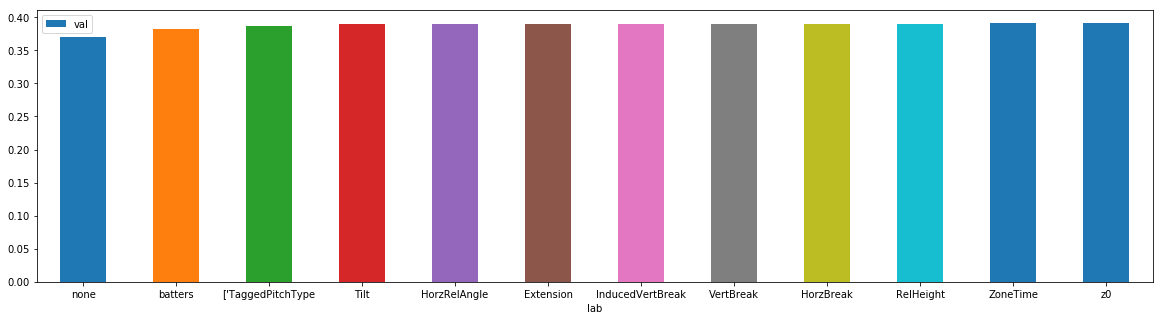

In [26]:
forward(10, 'LogisticRegression')

[0.3705150976909414 0.38139204545454547 0.41690340909090912
 0.49005681818181818 0.52059659090909094 0.53196022727272729
 0.52698863636363635 0.53551136363636365 0.54545454545454541
 0.54119318181818177 0.5390625 0.53125]


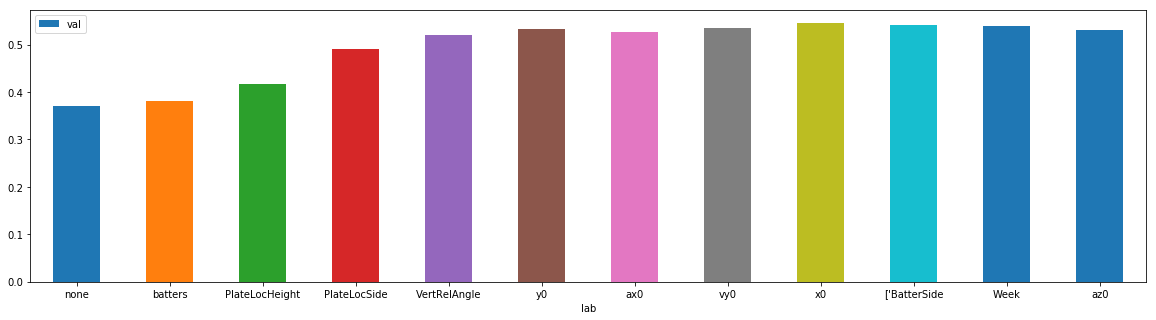

In [27]:
forward(10, 'DecisionTree')

[0.3705150976909414 0.0014657813369575168 0.00038244380842111797
 -0.011614795425717972 0.012933235544656196 0.17307893161843124
 0.26572821143042202 0.31952684089568473 0.3623111728613827
 0.36784251267183365 0.37408190303679312 0.37855225657864722]


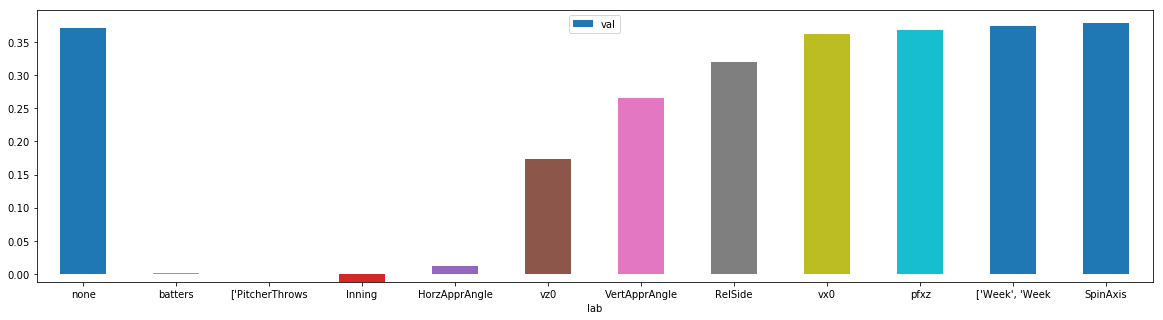

In [28]:
forward(10, 'RandomForest')

In [31]:
#PlateHeight = 1.084302
#PlateSide = -0.382324
#RelAng = -3.393975
#PitchType = 'Curveball'

import pandas as pd
from sklearn.ensemble import RandomForestClassifier

Players = X1.Batter
Tagged = X1.TaggedPitchType
PlateLocH = X1.PlateLocHeight
PlateLocS = X1.PlateLocSide
RelVertAng = X1.VertRelAngle

data = pd.concat([Tagged, PlateLocH, PlateLocS, RelVertAng, Players], axis =1)

rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)

PlateHeight = float(input('enter PlateLocHeight: '))
PlateSide = float(input('enter PlateLocSide: '))
RelAng = float(input('enter VertRelAng: '))
PitchType = input('enter TaggedPitchType: ')
print('\n')
#data2 = pd.DataFrame([[PitchType, PlateHeight, PlateSide, RelAnd, dud]])

for i in data.Batter.unique():
    data = pd.concat([Tagged, PlateLocH, PlateLocS, RelVertAng, Players], axis =1)
    data2 = pd.DataFrame([[PitchType, PlateHeight, PlateSide, RelAng, i]], columns = ['TaggedPitchType', 'PlateLocHeight', 'PlateLocSide','VertRelAngle','Batter'])
    #print(i)
    data = data.append(data2)
    #print(data2)
    dummies = pd.get_dummies(data)
    x = dummies.iloc[-1,:]
    dummies = dummies[:-1]
    #print(x)
    #print(dummies.shape)-3.0
    rf.fit(dummies, y)
    rfList = rf.predict_proba([x])
    #print(i, rfList[0][1])
    print(i,':','\n','BallCalled: ', rfList[0][0],'   ','StrikeCalled: ', rfList[0][1],'   ','Inplay: ', rfList[0][2],'   ','FoulBall: ', rfList[0][3],'   ','HitbyPitch: ', rfList[0][4],'   ','Undefined: ', rfList[0][5],'   ','BallIntentional: ', rfList[0][6],'\n')
    
#Ballcalled:0 StrikeSwinging': 1,'StrikeCalled': 2, 'InPlay' : 3, 'FoulBall' : 4, 'HitByPitch': 5, 'Undefined': 6, 'BallIntentional': 7 })


enter PlateLocHeight: 1.76
enter PlateLocSide: 0.35
enter VertRelAng: -3.56
enter TaggedPitchType: Fastball


DeLoach, Zach : 
 BallCalled:  0.09     StrikeCalled:  0.021     Inplay:  0.827     FoulBall:  0.047     HitbyPitch:  0.015     Undefined:  0.0     BallIntentional:  0.0 

Helman, Michael : 
 BallCalled:  0.116     StrikeCalled:  0.059     Inplay:  0.219     FoulBall:  0.515     HitbyPitch:  0.086     Undefined:  0.005     BallIntentional:  0.0 

Shewmake, Braden : 
 BallCalled:  0.335     StrikeCalled:  0.024     Inplay:  0.299     FoulBall:  0.217     HitbyPitch:  0.125     Undefined:  0.0     BallIntentional:  0.0 

Andritsos, Chris : 
 BallCalled:  0.128     StrikeCalled:  0.047     Inplay:  0.246     FoulBall:  0.514     HitbyPitch:  0.065     Undefined:  0.0     BallIntentional:  0.0 

Bedford, Cole : 
 BallCalled:  0.151     StrikeCalled:  0.028     Inplay:  0.477     FoulBall:  0.256     HitbyPitch:  0.088     Undefined:  0.0     BallIntentional:  0.0 

Janca, George : 